### Importing Libraries

In [114]:
import pandas as pd
# from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from tensorflow.keras.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import numpy as np
from pandas.tseries.offsets import DateOffset
import seaborn as sns
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Retrieving Data 

In [2]:
df = pd.read_csv('Aqi_new.csv')

In [3]:
df

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,Station
0,01-01-2020 00:00,02-01-2020 00:00,54.66,129.15,33.13,33.83,66.98,None,12.36,2.55,...,65.36,0.09,125.67,114.69,769.84,0,None,None,0.0,bandra
1,02-01-2020 00:00,03-01-2020 00:00,60.25,117.23,17.77,28.03,45.81,None,14.1,2.38,...,71.28,0.08,109.09,112.69,771.42,0,None,None,0.0,bandra
2,03-01-2020 00:00,04-01-2020 00:00,55.67,100.72,21.19,25.7,46.89,None,13.2,2.22,...,68.72,0.12,127.71,103.66,770.8,0,None,None,0.0,bandra
3,04-01-2020 00:00,05-01-2020 00:00,31.42,49.3,16.71,23.64,40.35,None,4.21,2.03,...,64.46,0.1,113.06,107.06,769.49,0,None,None,0.0,bandra
4,05-01-2020 00:00,06-01-2020 00:00,44.59,62.4,25.56,30.41,55.98,None,3.9,2.43,...,64.61,0.26,127.22,106.37,768.44,0,None,None,0.0,bandra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,28-12-2022 00:00,29-12-2022 00:00,67.85,181.56,39.88,3.96,30.16,12.05,27.71,1.38,...,77.73,0.94,179.72,154.85,1014.31,None,23.73,None,0.0,worli
6578,29-12-2022 00:00,30-12-2022 00:00,74.86,204.98,64.3,20.6,58.71,13,22.28,1.58,...,78.01,0.87,184.55,73.03,1015.57,None,24.36,None,0.0,worli
6579,30-12-2022 00:00,31-12-2022 00:00,70.79,189.37,46.32,5.76,36.86,13.08,21.71,1.29,...,76.4,1.01,186.05,152.57,1016.52,None,24.2,None,0.0,worli
6580,31-12-2022 00:00,01-01-2023 00:00,52.43,133.25,23.47,2.29,14.24,16.01,19.24,1.07,...,73.65,1.27,181.93,143.27,1016.12,None,23.56,None,0.0,worli


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    6582 non-null   object 
 1   To Date      6582 non-null   object 
 2   PM2.5        6582 non-null   object 
 3   PM10         6582 non-null   object 
 4   NO           6582 non-null   object 
 5   NO2          6582 non-null   object 
 6   NOx          6582 non-null   object 
 7   NH3          6582 non-null   object 
 8   SO2          6582 non-null   object 
 9   CO           6582 non-null   object 
 10  Ozone        6582 non-null   object 
 11  Benzene      6582 non-null   object 
 12  Toluene      6582 non-null   object 
 13  Eth-Benzene  6582 non-null   object 
 14  MP-Xylene    6582 non-null   object 
 15  RH           5485 non-null   object 
 16  WS           6582 non-null   object 
 17  WD           6582 non-null   object 
 18  SR           6582 non-null   object 
 19  BP    

In [5]:
df['From Date'] = pd.to_datetime(df['From Date'],infer_datetime_format=True)

### Data Engineering 

In [6]:
df = df.replace('None', np.nan)
df = df.fillna(0)

In [7]:
df1 = df.copy()
df1.drop(['From Date','To Date','Station'], axis = 'columns', inplace=True)
df1.head()
df1 = df1.astype(float)
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,MP-Xylene,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF
0,54.66,129.15,33.13,33.83,66.98,0.0,12.36,2.55,35.38,0.00,...,0.0,65.36,0.09,125.67,114.69,769.84,0.0,0.0,0.0,0.0
1,60.25,117.23,17.77,28.03,45.81,0.0,14.10,2.38,23.03,0.00,...,0.0,71.28,0.08,109.09,112.69,771.42,0.0,0.0,0.0,0.0
2,55.67,100.72,21.19,25.70,46.89,0.0,13.20,2.22,33.10,0.00,...,0.0,68.72,0.12,127.71,103.66,770.80,0.0,0.0,0.0,0.0
3,31.42,49.30,16.71,23.64,40.35,0.0,4.21,2.03,36.92,0.01,...,0.0,64.46,0.10,113.06,107.06,769.49,0.0,0.0,0.0,0.0
4,44.59,62.40,25.56,30.41,55.98,0.0,3.90,2.43,27.56,0.00,...,0.0,64.61,0.26,127.22,106.37,768.44,0.0,0.0,0.0,0.0


In [8]:
df = df.loc[:, ['From Date','To Date','Station']]

In [9]:
final_df = pd.concat([df,df1],axis='columns')
final_df.drop(['To Date'],axis=1,inplace=True)

array([<AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>], dtype=object)

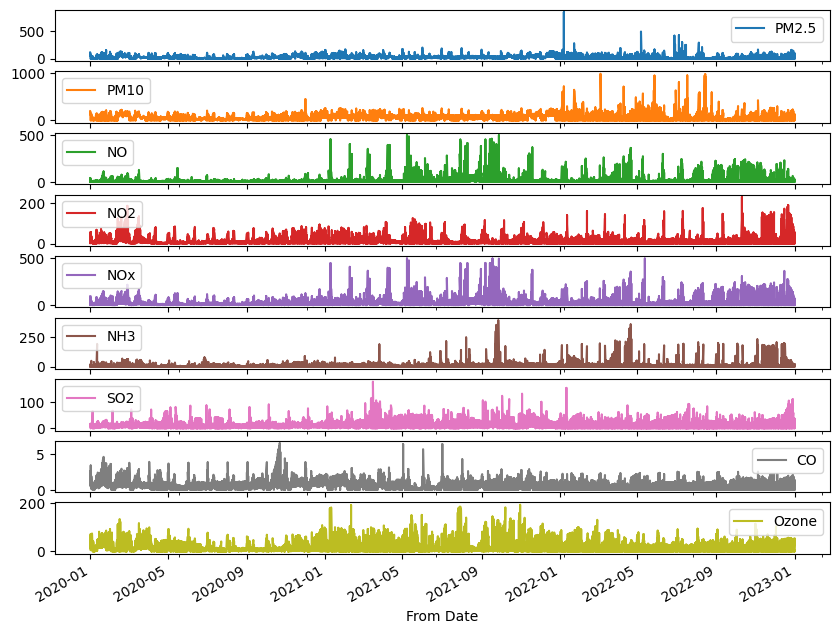

In [10]:
final_df.set_index('From Date')[['PM2.5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone']].plot(subplots=True)

In [11]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

final_df["PM2.5_SubIndex"] = final_df['PM2.5'].apply(lambda x: get_PM25_subindex(x))

In [12]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

final_df["PM10_SubIndex"] = final_df["PM10"].apply(lambda x: get_PM10_subindex(x))

In [13]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

final_df["SO2_SubIndex"] = final_df["SO2"].apply(lambda x: get_SO2_subindex(x))

In [14]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

final_df["NOx_SubIndex"] = final_df["NOx"].apply(lambda x: get_NOx_subindex(x))

In [15]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

final_df["CO_SubIndex"] = final_df["CO"].apply(lambda x: get_CO_subindex(x))

In [16]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

final_df["Ozone_SubIndex"] = final_df["Ozone"].apply(lambda x: get_O3_subindex(x))

In [17]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

final_df["NH3_SubIndex"] = final_df['NH3'].apply(lambda x: get_NH3_subindex(x))

In [18]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

final_df["Checks"] = (final_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (final_df["PM10_SubIndex"] > 0).astype(int) + \
                (final_df["SO2_SubIndex"] > 0).astype(int) + \
                (final_df["NOx_SubIndex"] > 0).astype(int) + \
                (final_df["CO_SubIndex"] > 0).astype(int) + \
                (final_df["NH3_SubIndex"] > 0).astype(int) + \
                (final_df["Ozone_SubIndex"] > 0).astype(int)

final_df["AQI_calculated"] = round(final_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                  "CO_SubIndex", "Ozone_SubIndex","NH3_SubIndex"]].max(axis = 1))

final_df.loc[final_df["PM2.5_SubIndex"] + final_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
final_df.loc[final_df.Checks < 3, "AQI_calculated"] = np.NaN


final_df["AQI_bucket_calculated"] = final_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
final_df[~final_df.AQI_calculated.isna()].head(10)

,From Date,Station,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,Ozone_SubIndex,NH3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2020-01-01,bandra,54.66,129.15,33.13,33.83,66.98,0.0,12.36,2.55,...,91.100000,119.433333,15.4500,83.7250,106.875,35.38,0.0,6,119.0,Moderate
1,2020-02-01,bandra,60.25,117.23,17.77,28.03,45.81,0.0,14.10,2.38,...,100.833333,111.486667,17.6250,57.2625,104.750,23.03,0.0,6,111.0,Moderate
2,2020-03-01,bandra,55.67,100.72,21.19,25.70,46.89,0.0,13.20,2.22,...,92.783333,100.480000,16.5000,58.6125,102.750,33.10,0.0,6,103.0,Moderate
3,2020-04-01,bandra,31.42,49.30,16.71,23.64,40.35,0.0,4.21,2.03,...,52.366667,49.300000,5.2625,50.4375,100.375,36.92,0.0,6,100.0,Satisfactory
4,2020-05-01,bandra,44.59,62.40,25.56,30.41,55.98,0.0,3.90,2.43,...,74.316667,62.400000,4.8750,69.9750,105.375,27.56,0.0,6,105.0,Moderate
5,2020-06-01,bandra,44.49,75.68,24.34,34.11,58.45,0.0,7.70,2.50,...,74.150000,75.680000,9.6250,73.0625,106.250,27.52,0.0,6,106.0,Moderate
6,2020-07-01,bandra,52.25,102.83,32.95,33.54,66.49,0.0,11.63,2.74,...,87.083333,101.886667,14.5375,83.1125,109.250,25.74,0.0,6,109.0,Moderate
7,2020-08-01,bandra,42.44,80.04,15.43,29.75,45.19,0.0,20.26,2.24,...,70.733333,80.040000,25.3250,56.4875,103.000,32.54,0.0,6,103.0,Moderate
8,2020-09-01,bandra,42.42,85.09,15.13,37.41,51.83,0.0,21.21,2.44,...,70.700000,85.090000,26.5125,64.7875,105.500,33.93,0.0,6,106.0,Moderate
9,2020-10-01,bandra,51.17,106.16,18.92,42.38,60.65,0.0,28.22,2.62,...,85.283333,104.106667,35.2750,75.8125,107.750,30.83,0.0,6,108.0,Moderate


In [19]:
final_df.columns.get_loc("TOT-RF")

23

In [20]:
final_df.columns.get_loc("PM2.5")

2

<AxesSubplot:>

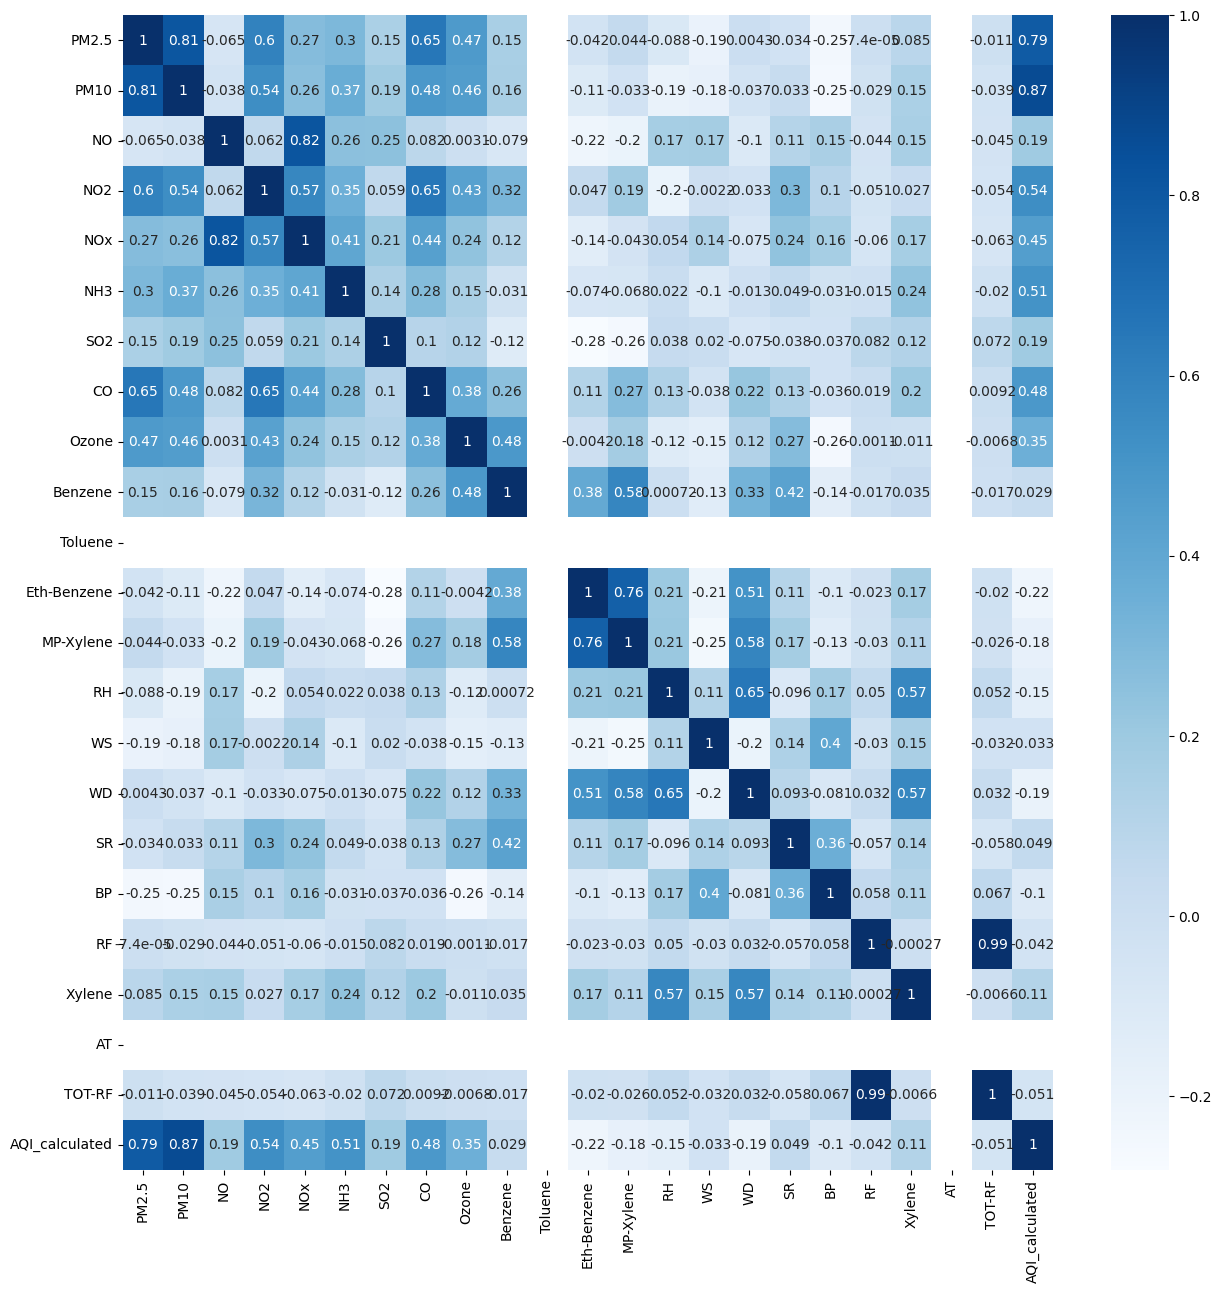

In [115]:
correlation_matrix = final_df.corr()
plt.figure(figsize = (15,15))
# Create a correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

In [22]:
final_df.drop(['AQI_bucket_calculated','Checks','PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex',
       'CO_SubIndex', 'Ozone_SubIndex', 'NH3_SubIndex',],axis=1,inplace=True)

In [23]:
final_df.head()

,From Date,Station,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated
0,2020-01-01,bandra,54.66,129.15,33.13,33.83,66.98,0.0,12.36,2.55,...,65.36,0.09,125.67,114.69,769.84,0.0,0.0,0.0,0.0,119.0
1,2020-02-01,bandra,60.25,117.23,17.77,28.03,45.81,0.0,14.10,2.38,...,71.28,0.08,109.09,112.69,771.42,0.0,0.0,0.0,0.0,111.0
2,2020-03-01,bandra,55.67,100.72,21.19,25.70,46.89,0.0,13.20,2.22,...,68.72,0.12,127.71,103.66,770.80,0.0,0.0,0.0,0.0,103.0
3,2020-04-01,bandra,31.42,49.30,16.71,23.64,40.35,0.0,4.21,2.03,...,64.46,0.10,113.06,107.06,769.49,0.0,0.0,0.0,0.0,100.0
4,2020-05-01,bandra,44.59,62.40,25.56,30.41,55.98,0.0,3.90,2.43,...,64.61,0.26,127.22,106.37,768.44,0.0,0.0,0.0,0.0,105.0


### Calculate average of aqi and pollutants by each day

In [25]:
testDf = final_df.sort_values('From Date')

In [26]:
testDf.head()

,From Date,Station,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated
0,2020-01-01,bandra,54.66,129.15,33.13,33.83,66.98,0.00,12.36,2.55,...,65.36,0.09,125.67,114.69,769.84,0.0,0.00,0.0,0.0,119.0
2194,2020-01-01,powai,100.03,154.38,9.27,29.30,38.56,14.19,9.21,1.14,...,75.27,0.52,231.51,304.43,0.00,0.0,21.89,0.0,0.0,233.0
5485,2020-01-01,worli,116.30,171.29,39.64,52.55,92.19,11.40,11.29,1.07,...,68.94,0.76,170.38,240.64,0.00,0.0,22.27,0.0,0.0,288.0
4388,2020-01-01,borivali-east,79.46,131.88,1.94,1.52,3.46,13.92,8.95,0.67,...,79.17,0.42,157.74,260.90,0.00,0.0,19.13,0.0,0.0,165.0
3291,2020-01-01,colaba,96.13,163.70,24.57,51.59,76.16,8.63,16.99,0.77,...,66.42,30.49,125.74,223.36,0.00,0.0,21.93,0.0,0.0,220.0


In [27]:
# Group the data by 'From Date' and 'Station'
grouped_data = df.groupby(['From Date', 'Station'])


In [28]:
grouped_data

In [29]:
# Calculate the AQI for each date by taking the mean of pollutants and AQI based on station
average_data = final_df.groupby('From Date').mean(numeric_only=True).reset_index()
average_data

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated
0,2020-01-01,93.946667,158.266667,25.185000,37.113333,62.298333,9.065000,10.951667,1.250000,46.341667,...,59.193333,5.471667,158.550000,204.648333,128.306667,0.0,17.606667,0.0,0.0,219.166667
1,2020-01-02,58.698333,112.606667,13.050000,32.803333,45.503333,12.890000,6.618333,1.181667,43.200000,...,59.090000,0.868333,158.573333,205.108333,128.003333,0.0,18.373333,0.0,0.0,138.000000
2,2020-01-03,39.910000,98.695000,7.673333,21.078333,28.745000,17.916667,9.183333,0.758333,23.305000,...,60.365000,0.946667,150.350000,269.503333,127.835000,0.0,20.910000,0.0,0.0,101.333333
3,2020-01-04,16.898333,45.783333,3.151667,4.718333,7.838333,6.563333,8.875000,0.488333,37.458333,...,61.696667,0.993333,152.263333,308.686667,127.805000,0.0,22.651667,0.0,0.0,59.400000
4,2020-01-05,18.835000,46.618333,2.998333,1.266667,4.215000,1.145000,18.373333,0.393333,19.261667,...,50.426667,0.845000,165.746667,223.756667,127.851667,0.0,19.926667,0.0,0.0,51.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2022-12-28,58.953333,93.305000,19.103333,29.591667,46.361667,8.035000,27.958333,1.035000,14.635000,...,54.248333,6.763333,126.538333,249.570000,815.526667,0.0,19.336667,0.0,0.0,182.600000
1093,2022-12-29,60.091667,102.888333,30.408333,30.933333,56.976667,9.158333,27.875000,1.095000,14.201667,...,53.931667,6.770000,111.000000,235.933333,828.196667,0.0,19.693333,0.0,0.0,191.400000
1094,2022-12-30,66.506667,88.933333,20.588333,30.246667,48.298333,10.275000,17.793333,0.925000,14.281667,...,37.975000,0.656667,85.281667,38.141667,650.260000,0.0,16.028333,0.0,0.0,211.600000
1095,2022-12-31,46.468333,64.345000,12.811667,24.593333,35.465000,9.730000,13.278333,0.798333,13.795000,...,36.655000,0.886667,89.296667,36.591667,657.643333,0.0,15.740000,0.0,0.0,140.200000


In [30]:
average_data.columns

Index(['From Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
       'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'RF', 'Xylene', 'AT', 'TOT-RF', 'AQI_calculated'],
      dtype='object')

In [31]:
average_data[average_data['From Date']== '2020-01-01']

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated
0,2020-01-01,93.946667,158.266667,25.185,37.113333,62.298333,9.065,10.951667,1.25,46.341667,...,59.193333,5.471667,158.55,204.648333,128.306667,0.0,17.606667,0.0,0.0,219.166667


In [33]:
final_df = average_data

### Feature Engineering 

In [34]:
final_df.isnull().sum()

From Date         0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
SO2               0
CO                0
Ozone             0
Benzene           0
Toluene           0
Eth-Benzene       0
MP-Xylene         0
RH                0
WS                0
WD                0
SR                0
BP                0
RF                0
Xylene            0
AT                0
TOT-RF            0
AQI_calculated    0
dtype: int64

In [35]:
final_df[final_df.AQI_calculated.isna()].head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated


In [36]:
final_df['AQI_calculated'] = final_df['AQI_calculated'].fillna(0) 

In [38]:
final_df = final_df[final_df.AQI_calculated != 0]

In [39]:
final_df.shape

(1097, 24)

In [40]:
final_df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated
0,2020-01-01,93.946667,158.266667,25.185000,37.113333,62.298333,9.065000,10.951667,1.250000,46.341667,...,59.193333,5.471667,158.550000,204.648333,128.306667,0.0,17.606667,0.0,0.0,219.166667
1,2020-01-02,58.698333,112.606667,13.050000,32.803333,45.503333,12.890000,6.618333,1.181667,43.200000,...,59.090000,0.868333,158.573333,205.108333,128.003333,0.0,18.373333,0.0,0.0,138.000000
2,2020-01-03,39.910000,98.695000,7.673333,21.078333,28.745000,17.916667,9.183333,0.758333,23.305000,...,60.365000,0.946667,150.350000,269.503333,127.835000,0.0,20.910000,0.0,0.0,101.333333
3,2020-01-04,16.898333,45.783333,3.151667,4.718333,7.838333,6.563333,8.875000,0.488333,37.458333,...,61.696667,0.993333,152.263333,308.686667,127.805000,0.0,22.651667,0.0,0.0,59.400000
4,2020-01-05,18.835000,46.618333,2.998333,1.266667,4.215000,1.145000,18.373333,0.393333,19.261667,...,50.426667,0.845000,165.746667,223.756667,127.851667,0.0,19.926667,0.0,0.0,51.666667


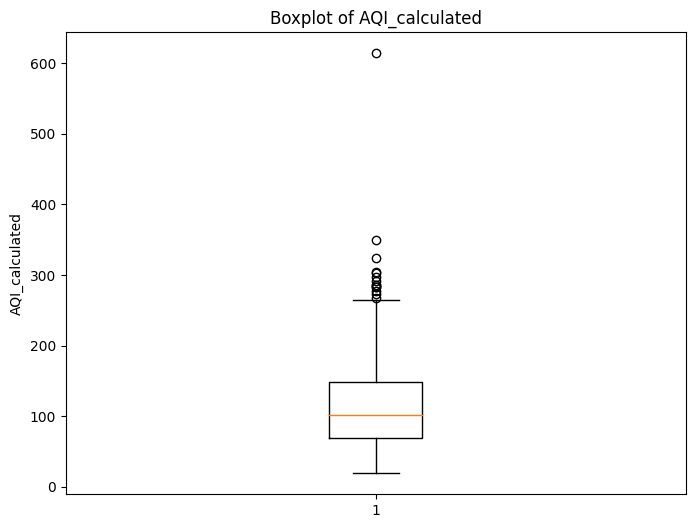

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(final_df['AQI_calculated'])
plt.title('Boxplot of AQI_calculated')
plt.ylabel('AQI_calculated')
plt.show()

In [42]:
final_df[final_df['AQI_calculated'] >= 600]

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,BP,RF,Xylene,AT,TOT-RF,AQI_calculated
753,2022-01-23,138.631667,501.298333,2.845,8.571667,11.37,18.9,16.851667,0.553333,26.438333,...,46.156667,1.13,138.33,50.62,0.0,0.0,17.906667,0.0,0.0,614.2


In [43]:
# Remove rows with AQI greater than 1000
final_df = final_df[final_df['AQI_calculated'] <= 600]

In [45]:
df_input = final_df[['PM2.5','PM10','NO2','SO2', 'NOx','CO', 'NH3', 'Ozone','AQI_calculated']]

In [47]:
df_input.describe()

,PM2.5,PM10,NO2,SO2,NOx,CO,NH3,Ozone,AQI_calculated
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,36.048586,78.297489,15.625426,13.380953,32.468942,0.656174,11.861133,18.095579,113.063321
std,24.693480,44.252691,12.187585,5.266988,21.917185,0.320473,9.834192,10.469705,58.634845
min,2.315000,5.700000,1.266667,2.556667,4.215000,0.031667,0.676667,1.485000,19.250000
25%,16.811667,42.673750,6.505833,9.594167,15.778750,0.405000,5.880833,10.120833,69.000000
50%,28.912500,70.821667,11.049167,12.505833,27.428333,0.588333,9.934167,16.310833,102.083333
75%,53.359583,107.927917,22.049583,16.222917,42.694583,0.885417,14.282917,23.201250,148.175000
max,147.866667,299.705000,74.095000,35.373333,141.703333,1.911667,73.486667,66.225000,349.800000


In [49]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1096
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM2.5           1096 non-null   float64
 1   PM10            1096 non-null   float64
 2   NO2             1096 non-null   float64
 3   SO2             1096 non-null   float64
 4   NOx             1096 non-null   float64
 5   CO              1096 non-null   float64
 6   NH3             1096 non-null   float64
 7   Ozone           1096 non-null   float64
 8   AQI_calculated  1096 non-null   float64
dtypes: float64(9)
memory usage: 85.6 KB


In [50]:
test = df_input.iloc[:-900]
train = df_input.iloc[-900:]

In [52]:
train.shape

(900, 9)

In [54]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [55]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [56]:
win_length = 31
batch_size = 3
num_features = 9
train_generator = TimeseriesGenerator(scaled_train,scaled_train, length = win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(scaled_test,scaled_test, length = win_length,sampling_rate=1,batch_size=batch_size)

In [57]:
len(scaled_train)

900

In [58]:
len(train_generator) 

290

In [59]:
X,y = train_generator[0]

In [60]:
X.shape

(3, 31, 9)

In [61]:
y.shape

(3, 9)

### Deep Learning Model 

In [63]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(128,input_shape = (win_length,num_features),return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.SimpleRNN(128,return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.SimpleRNN(64,return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(train.shape[1]))

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 31, 128)           17664     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 31, 128)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 31, 128)           32896     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 31, 128)           0         
                                                                 
 dropout (Dropout)           (None, 31, 128)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [65]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 2,mode = 'min')

validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=win_length, batch_size=batch_size)

model.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam(),metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator,epochs=20,validation_data = validation_generator, shuffle = False, callbacks = [early_stopping])

Epoch 1/20
290/290 [==============================] - 4s 8ms/step - loss: 0.2016 - mean_absolute_error: 0.3389 - val_loss: 0.0460 - val_mean_absolute_error: 0.1775
Epoch 2/20
290/290 [==============================] - 2s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.1651 - val_loss: 0.0496 - val_mean_absolute_error: 0.1891
Epoch 3/20
290/290 [==============================] - 2s 8ms/step - loss: 0.0348 - mean_absolute_error: 0.1437 - val_loss: 0.0509 - val_mean_absolute_error: 0.1894


### Model Evaluation

In [66]:
model.evaluate(test_generator,verbose=0)

[0.05090302973985672, 0.1894187182188034]

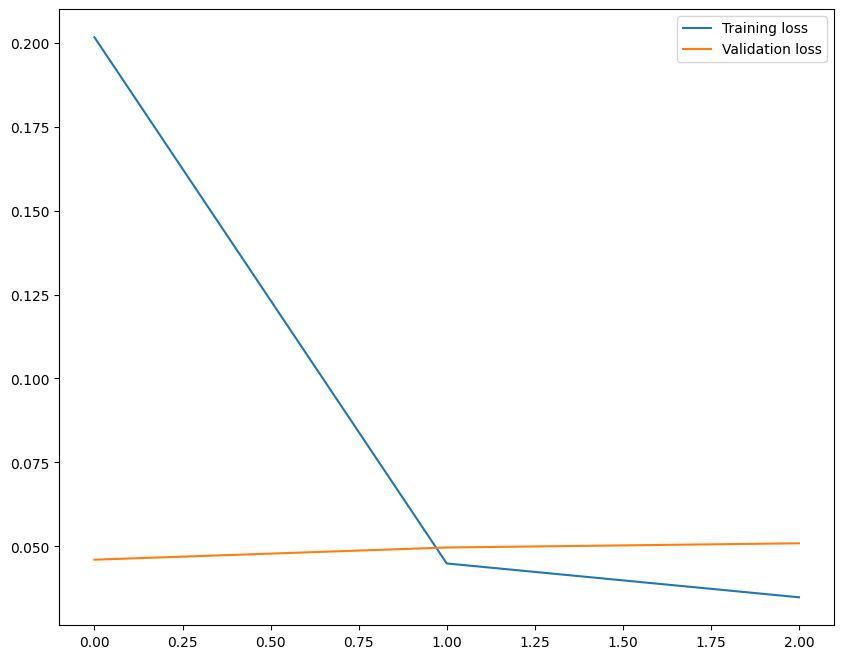

In [67]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [68]:
#holding my predictions
test_predictions = []

first_eval_batch = scaled_train[-win_length:]
current_batch = first_eval_batch.reshape((1,win_length,num_features))

for i in range(win_length):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    new_input = np.append(current_batch[:,1:,:],[[current_pred]] , axis=1)
    current_batch = new_input

1/1 [==============================] - 0s 17ms/step


In [69]:
current_pred.shape

(9,)

In [70]:
true_predictions = scaler.inverse_transform(test_predictions)

In [71]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)


In [72]:
import datetime
start_date = datetime.date(2023,1,2)
end_date = start_date + datetime.timedelta(days=win_length-1)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
ndf = pd.DataFrame({'Dates':date_range})
fin = pd.concat([ndf,true_predictions],axis=1)


<AxesSubplot:xlabel='From Date', ylabel='AQI_calculated'>

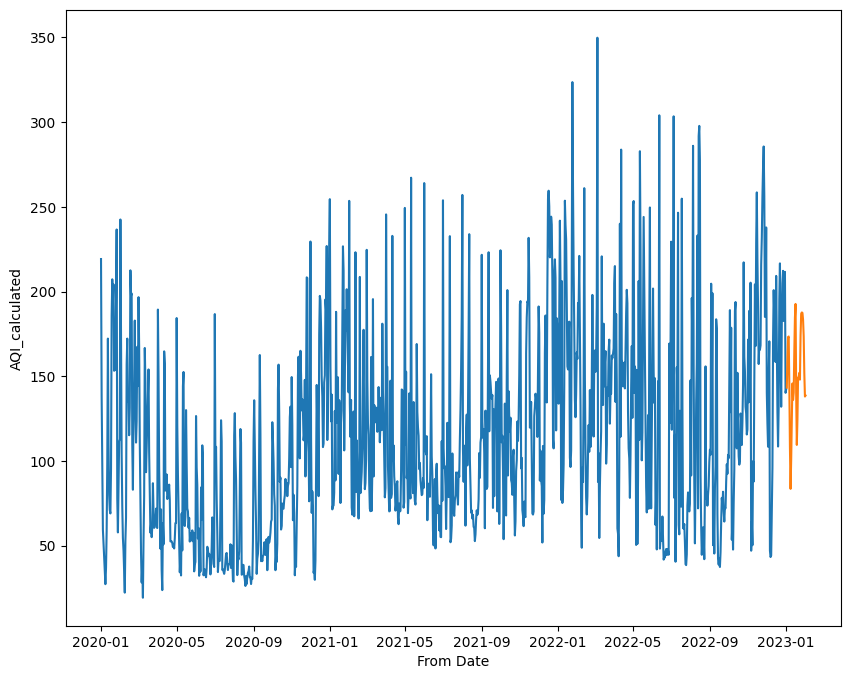

In [116]:
original = final_df[['From Date', 'AQI_calculated']]
original['From Date']=pd.to_datetime(original['From Date'])
# original = original.loc[original['From Date'] >= '2022-10-1']

sns.lineplot(x=original['From Date'], y=original['AQI_calculated'])
sns.lineplot(x=fin['Dates'], y=fin['AQI_calculated'])
# plt.xticks(rotation=25)

In [107]:
# from tensorflow.keras.models import load_model
# model.save("medelRNN_v1.h5")

### Forecasting Air Quality Index for next 31 days 

<AxesSubplot:xlabel='From Date', ylabel='AQI_calculated'>

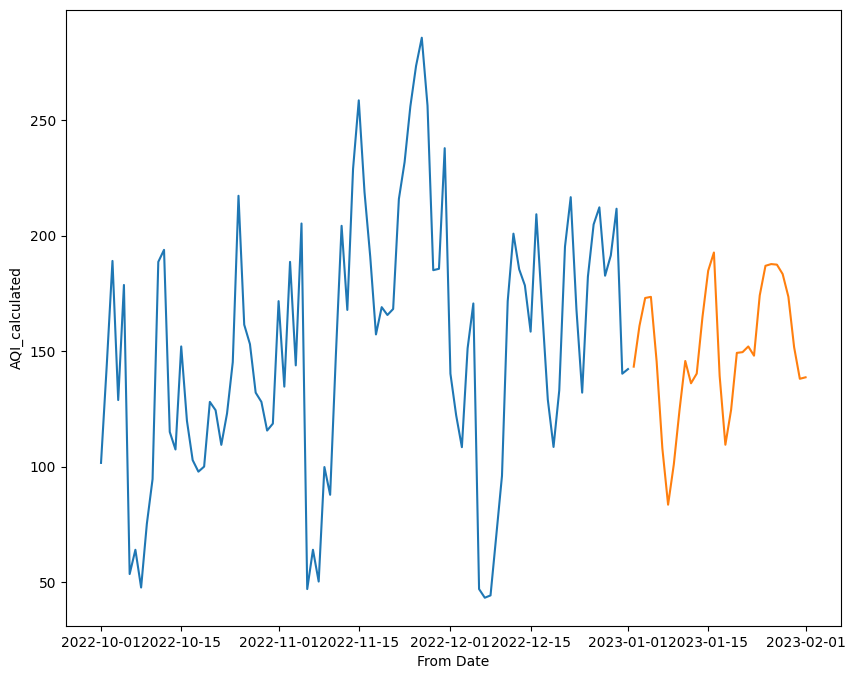

In [117]:
import seaborn as sns
original = final_df[['From Date', 'AQI_calculated']]
original['From Date']=pd.to_datetime(original['From Date'])
original = original.loc[original['From Date'] >= '2022-10-1']

sns.lineplot(x=original['From Date'], y=original['AQI_calculated'])
sns.lineplot(x=fin['Dates'], y=fin['AQI_calculated'])
# plt.xticks(rotation=25)

### Forecasting PM2.5 for next 31 days

<AxesSubplot:xlabel='From Date', ylabel='PM2.5'>

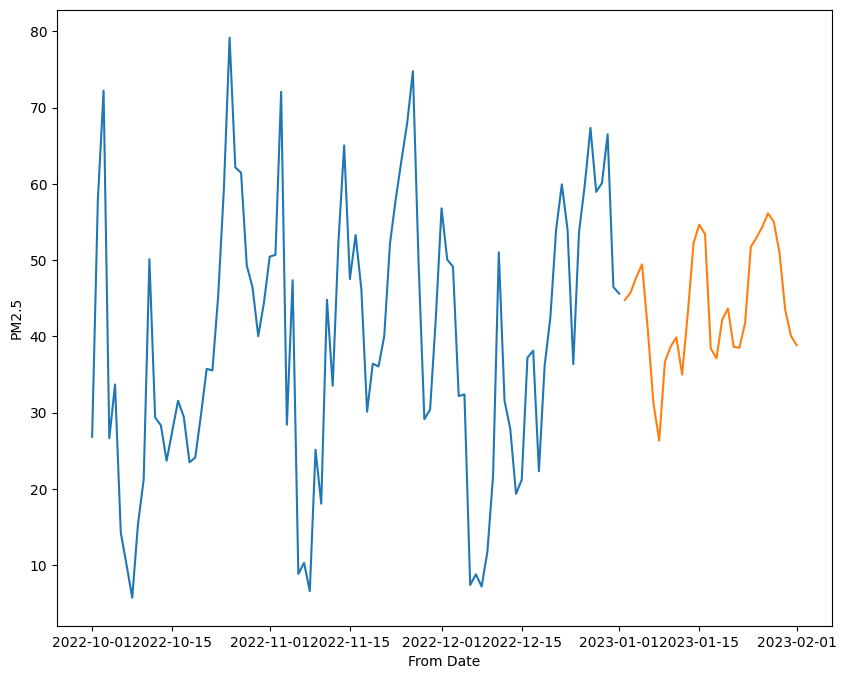

In [118]:
import seaborn as sns
original = final_df[['From Date', 'PM2.5']]
original['From Date']=pd.to_datetime(original['From Date'])
original = original.loc[original['From Date'] >= '2022-10-1']

sns.lineplot(x=original['From Date'], y=original['PM2.5'])
sns.lineplot(x=fin['Dates'], y=fin['PM2.5'])
# plt.xticks(rotation=25)

### Forecasting PM10 for next 31 days 

<AxesSubplot:xlabel='From Date', ylabel='PM10'>

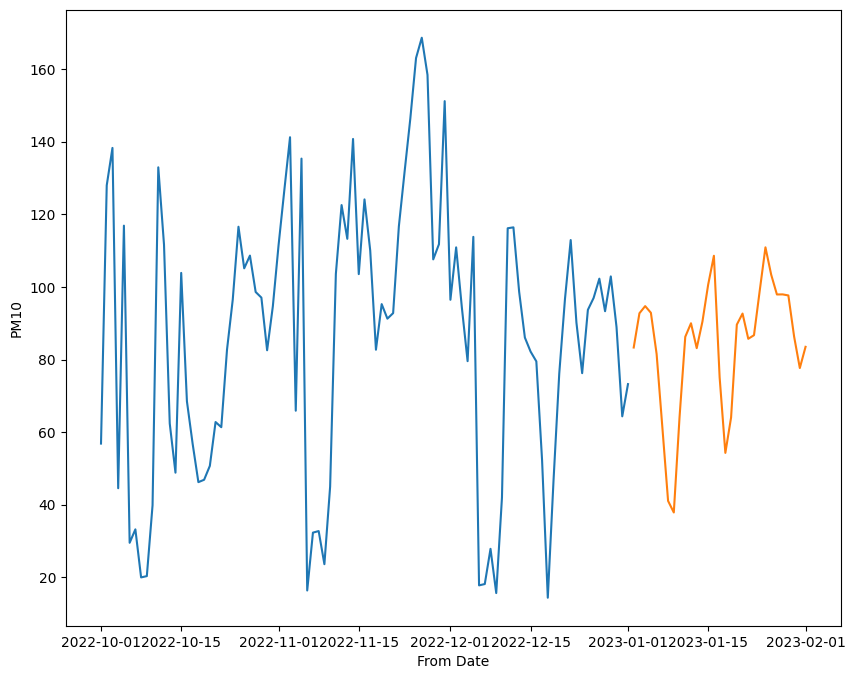

In [119]:
import seaborn as sns
original = final_df[['From Date', 'PM10']]
original['From Date']=pd.to_datetime(original['From Date'])
original = original.loc[original['From Date'] >= '2022-10-1']

sns.lineplot(x=original['From Date'], y=original['PM10'])
sns.lineplot(x=fin['Dates'], y=fin['PM10'])
# plt.xticks(rotation=25)

### RMSE, MSE MAPE

In [113]:
true = pd.read_csv('AQI_True_forecast.csv')
trueAqi = true[['AQI_calculated']]

forcastAQI = fin[['AQI_calculated']]

from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(forcastAQI,trueAqi))
print('RMSE = ',RMSE)

print('Mean AQI',trueAqi.mean())

from sklearn.metrics import mean_absolute_percentage_error

# Example actual and predicted values


mape = mean_absolute_percentage_error(trueAqi, forcastAQI)
print("MAPE:", mape)

from sklearn.metrics import r2_score
r2 = r2_score(forcastAQI,trueAqi)
print("R2 Score = ", r2)

RMSE =  67.77779973786727
Mean AQI AQI_calculated    199.855914
dtype: float64
MAPE: 0.24638719849000537
R2 Score =  -5.149521617262512


### Prediction 

In [84]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [86]:
features=data_scaled
target=data_scaled[:,0]

In [87]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [88]:
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, 
                                     sampling_rate=1, batch_size=batch_size)

In [89]:
predictions=model.predict(test_generator)

63/63 [==============================] - 0s 2ms/step


In [90]:
y_pred=model.predict(test_generator)

63/63 [==============================] - 0s 2ms/step


In [97]:
df_pred = pd.DataFrame(predictions)

In [100]:
rev_trans=scaler.inverse_transform(df_pred)

In [102]:
df_final=df_input[predictions.shape[0]*-1:]

In [103]:
df_final.count()

PM2.5             189
PM10              189
NO2               189
SO2               189
NOx               189
CO                189
NH3               189
Ozone             189
AQI_calculated    189
dtype: int64

In [120]:
# rev_trans[:,8]
df_final['Aqi_Pred']=rev_trans[:,8]

In [105]:
df_final

,PM2.5,PM10,NO2,SO2,NOx,CO,NH3,Ozone,AQI_calculated,Aqi_Pred
908,6.255000,23.881667,7.695000,19.213333,14.456667,0.486667,5.845000,13.483333,44.60,158.040543
909,76.150000,69.871667,6.366667,14.503333,16.468333,0.540000,4.236667,7.825000,169.25,121.079163
910,53.446667,69.366667,6.925000,19.185000,21.065000,0.591667,5.891667,6.110000,122.40,132.733429
911,24.916667,119.220000,9.115000,18.326667,20.010000,0.538333,6.601667,9.176667,166.20,106.035011
912,82.031667,125.851667,14.468333,19.145000,21.636667,0.626667,22.941667,20.848333,229.40,117.347397
...,...,...,...,...,...,...,...,...,...,...
1092,58.953333,93.305000,29.591667,27.958333,46.361667,1.035000,8.035000,14.635000,182.60,162.934616
1093,60.091667,102.888333,30.933333,27.875000,56.976667,1.095000,9.158333,14.201667,191.40,155.269119
1094,66.506667,88.933333,30.246667,17.793333,48.298333,0.925000,10.275000,14.281667,211.60,146.906815
1095,46.468333,64.345000,24.593333,13.278333,35.465000,0.798333,9.730000,13.795000,140.20,161.170746


<AxesSubplot:>

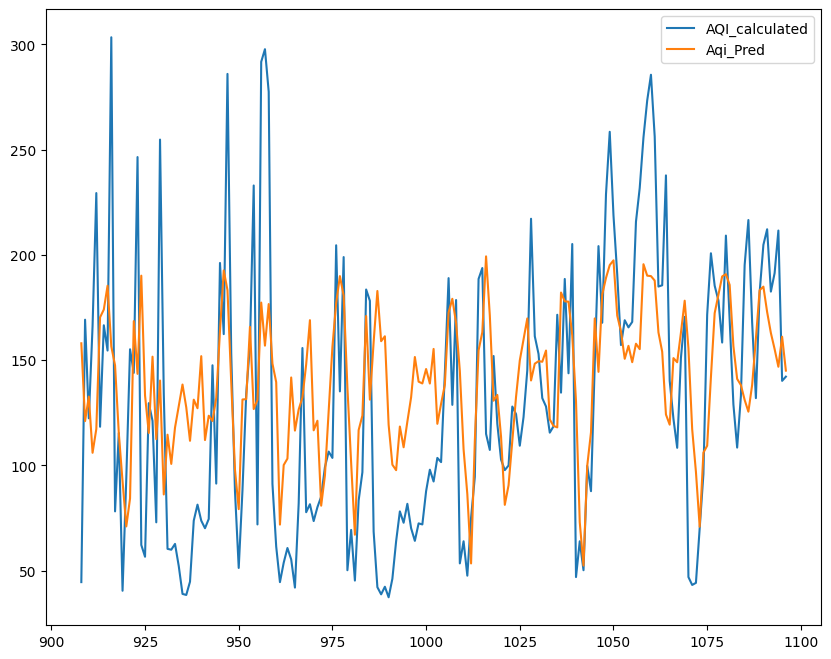

In [106]:
df_final[['AQI_calculated','Aqi_Pred']].plot()

In [112]:
trueAqi = df_final['AQI_calculated']

forcastAQI = df_final['Aqi_Pred']

from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(forcastAQI,trueAqi))
print('RMSE = ',RMSE)

print('Mean AQI',trueAqi.mean())

from sklearn.metrics import mean_absolute_percentage_error

# Example actual and predicted values


mape = mean_absolute_percentage_error(trueAqi, forcastAQI)
print("MAPE:", mape)

from sklearn.metrics import r2_score
r2 = r2_score(forcastAQI,trueAqi)
print("R2 Score = ", r2)

RMSE =  55.87500867029255
Mean AQI 130.13121693121695
MAPE: 0.513173835029339
R2 Score =  -2.0837891499546926
